In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.typing import NDArray
import preamble_figures

# Parameters
gamma = 0.9
r2 = 0.5
p3 = 0.1
theta3 = gamma * p3 / (1 - gamma * (1 - p3))
p2_null = 0.5

def compute_V(p2: float | NDArray[np.float64]) -> NDArray[np.float64]:
    V1 = p2 * r2 / (1 - gamma * (p2 + (1-p2)*theta3))
    V2 = theta3 * V1
    return np.vstack([V1, V2]).T

dist = lambda x,y: np.linalg.norm(x-y, ord=np.inf)
# Define ranges for p1 and epsilon
p2 = np.linspace(1e-3, 1, 1000)          # 100 points from 0 to 1 (linear scale)
eps = np.geomspace(1e-2, 1, 1000)     # 100 points from 1e-3 to 1 (geometric scale)

V_null = compute_V(p2_null)
V_conf = compute_V(p2)
diff = np.linalg.norm(V_null-V_conf, ord=np.inf, axis=1)


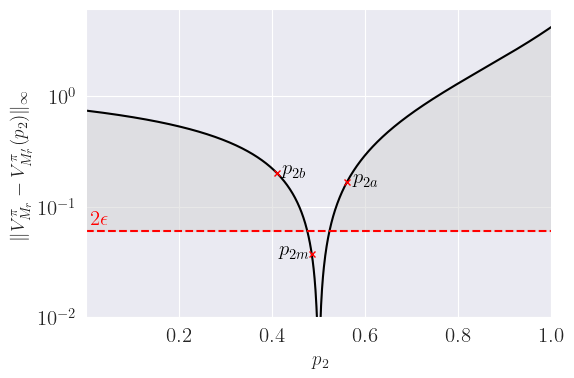

In [3]:
p21 = 0.56
p22 = 0.41
p2m = (p21+p22)/2

D11 = np.linalg.norm(V_null-compute_V(p21), ord=np.inf, axis=1)
D12 = np.linalg.norm(V_null-compute_V(p22), ord=np.inf, axis=1)
D1m = np.linalg.norm(V_null-compute_V(p2m), ord=np.inf, axis=1)


plt.figure(figsize=(6,4))
plt.plot(p2, diff, color='k')
plt.fill_between(p2, diff, np.minimum(diff,2*0.03), color='lightgray', alpha=0.5)#, label=r'$|V_0 - V_1| \leq \epsilon$')

plt.hlines(2 * 0.03, xmin=p2[0],xmax=p2[-1], color='r', linestyles='--')
plt.plot(p21,D11, marker='x', markersize=5, color='r')  # Plot the marker
plt.plot(p22, D12, marker='x', markersize=5, color='r')  # Plot the marker
plt.plot(p2m, D1m, marker='x', markersize=5, color='r')  # Plot the marker
plt.text(p21*1.02, D11, r'$p_{2a}$',  color='k')  # Adjust x and y as needed
plt.text(p22*1.02, D12, r'$p_{2b}$',  color='k')  # Adjust x and y as needed
plt.text(p2m*0.85, D1m, r'$p_{2m}$',  color='k')  # Adjust x and y as needed

plt.text(0.01, 2*0.03+0.01, r'$2\epsilon$',  color='r')  # Adjust x and y as needed



# Set logarithmic scale for the y-axis (epsilon)
plt.yscale('log')
plt.ylim(bottom=eps[0])
plt.xlim(left=p2[0], right=p2[-1])
# Labels and title
plt.xlabel('$p_2$', fontsize=14)
plt.ylabel(r"$\|V_{M_r}^\pi- V_{M_r'}^\pi(p_2)\|_\infty$", fontsize=14)



# Show the plot
plt.savefig("figures/example_non_convexity.pdf", bbox_inches='tight')
